<a href="https://colab.research.google.com/github/lcbjrrr/ML315/blob/main/ML315_10_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks


Neural networks are a type of machine learning model inspired by the structure and function of the human brain. They consist of interconnected nodes (neurons) organized in layers.

*   **Input Layer:** Receives the initial data.
*   **Hidden Layers:** Process the data through a series of calculations and transformations. There can be one or more hidden layers.
*   **Output Layer:** Produces the final result or prediction.

Each connection between neurons has a weight, which is adjusted during the training process. The network learns by minimizing the difference between its predictions and the actual outcomes. Neural networks are particularly effective for tasks like image recognition, natural language processing, and pattern detection.

In [3]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/play_tr.csv')
train.head()

,sunny,temp,humidity,wind,play
0,1,1,1,2,0
1,1,1,1,1,0
2,2,1,1,2,1
3,3,2,1,2,1
4,3,3,2,2,1


## TensorFlow and Keras

TensorFlowis an open-source machine learning library from Google, providing tools for building and training neural networks. And, Keras is a user-friendly API that runs on TensorFlow, simplifying the process of building and experimenting with neural networks. Together, they offer a powerful and accessible platform for developing neural network models.

In [4]:
import tensorflow
from tensorflow import keras
#4 | 3 | 2 | 1
nn = keras.Sequential([
      keras.layers.Input((4,)),
      keras.layers.Dense(3, activation='relu'),
      keras.layers.Dense(2, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam' , loss='binary_crossentropy')

nn.fit(train[['sunny','temp','humidity','wind']] , train['play'])
preds = nn.predict(train[['sunny','temp','humidity','wind']] )
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6931
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.50025   ],
       [0.50025   ],
       [0.50025   ],
       [0.50025   ],
       [0.50025   ],
       [0.50025   ],
       [0.50025   ],
       [0.50025   ],
       [0.50025004],
       [0.50025004],
       [0.50025004],
       [0.50025004],
       [0.50025004],
       [0.50025004]], dtype=float32)

In [8]:
preds_train = preds > 0.5
#preds_train

In [9]:
from sklearn.metrics import accuracy_score
acc_train= accuracy_score(train['play'],preds_train)
acc_train*100

64.28571428571429

## NN: Testing

In [24]:
test = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/play_ts.csv')
test.head()

,sunny,temp,humidity,wind,play
0,2,1,1,2,1
1,1,1,1,2,0
2,1,1,1,1,0
3,2,1,1,2,0
4,3,2,1,2,1


After training a neural network, you can use it to make predictions on new, unseen data.

In [25]:
preds = nn.predict(test[['sunny','temp','humidity','wind']] )
preds_test = preds>0.5
print(preds_test)
test['play']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


,play
0,1
1,0
2,0
3,0
4,1
5,0


Accuracy is a common metric used to evaluate the performance of a classification model, representing the proportion of correct predictions out of the total number of predictions.

In [26]:
from sklearn.metrics import accuracy_score
acc_test= accuracy_score(test['play'],preds_test)
acc_test*100

33.33333333333333

A confusion matrix is a table that summarizes the performance of a classification model, showing the counts of true positive, true negative, false positive, and false negative predictions.

[[0 4]
 [0 2]]


<Axes: >

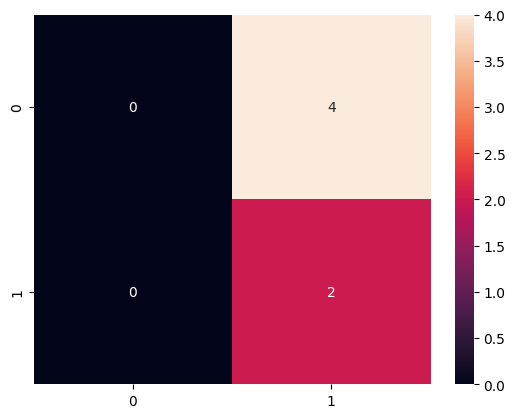

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test['play'] , preds_test)
print(cm)
sns.heatmap(cm, annot=True)

Precision measures the accuracy of positive predictions, while recall measures the ability of the model to find all the positive instances.

In [28]:
from sklearn.metrics import classification_report
print(classification_report(test['play'] , preds_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
